In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles

In [2]:
dbFile = 'baseline_v1.4_10yrs.db'
conn = db.OpsimDatabase(dbFile)
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)


In [3]:
bundleList = []
sql = 'filter="r"'
metric = metrics.PhaseGapMetric()
slicer = slicers.HealpixSlicer()
summaryStats = [metrics.SumMetric()]
plotDict = {'colorMax': 27.4}
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict, summaryMetrics=summaryStats))

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


In [4]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()


Querying database SummaryAllProps with constraint filter="r" for columns ['observationStartMJD', 'fieldDec', 'fieldRA']
Found 474955 visits
Running:  ['opsim_Phase_Gap_r_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Plotting figures with "filter="r"" constraint now.


/Users/yoachim/git_repos/sims_maf/python/lsst/sims/maf/plots/plotHandler.py:518: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn('Cannot plot object metric values with this plotter.')
/Users/yoachim/git_repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 529 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 0.222867  dipole: lon: -147.714, lat: 85.347, amp: 0.0144167


/Users/yoachim/git_repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 739 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 0.0996575  dipole: lon: -90.3306, lat: 52.9399, amp: 0.0155728


/Users/yoachim/git_repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 689 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 0.0724953  dipole: lon: -89.3193, lat: 46.917, amp: 0.0182156


/Users/yoachim/git_repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:56: RuntimeWarning: divide by zero encountered in double_scalars
  nbins = (binmax - binmin) / binwidth
/Users/yoachim/git_repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make inf bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 3.50938  dipole: lon: -87.4385, lat: 66.5934, amp: 0.794088
Plotting complete.


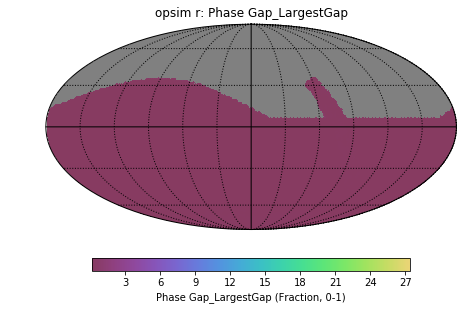

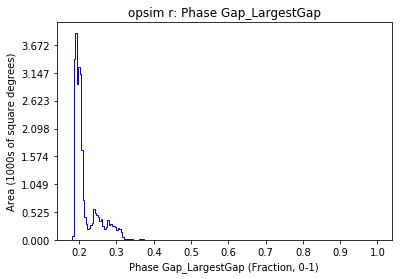

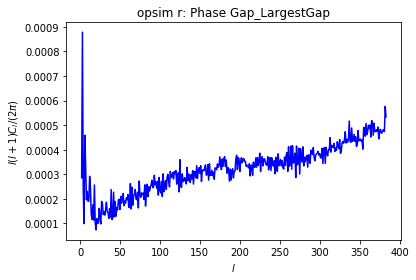

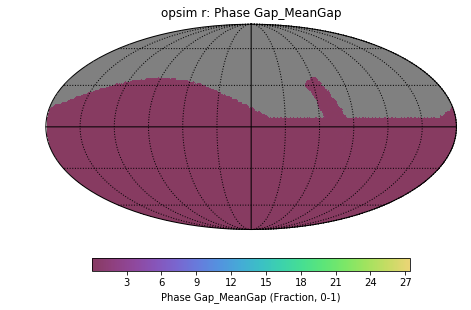

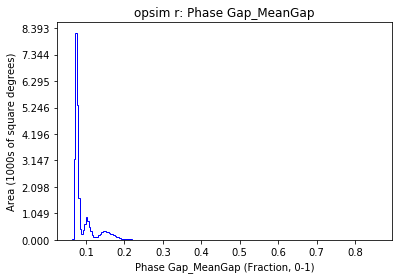

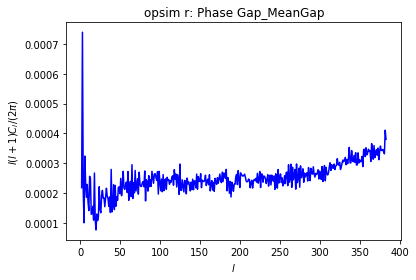

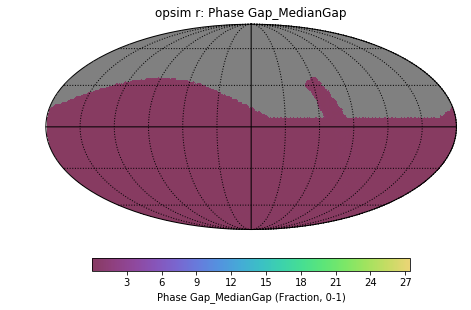

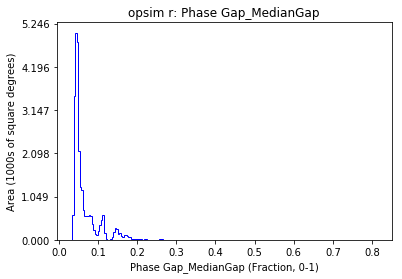

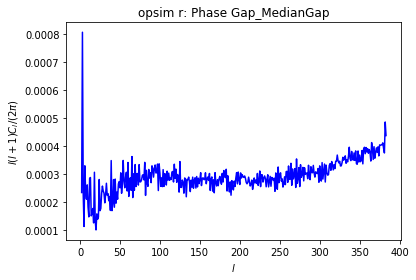

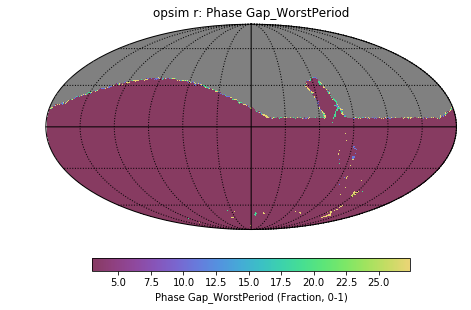

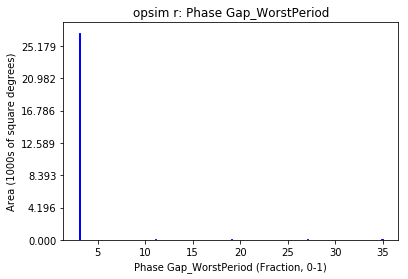

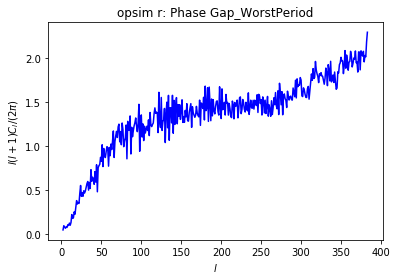

In [24]:
bg.plotAll(closefigs=False)

In [28]:
bd

{'opsim_Phase_Gap_r_HEAL': <lsst.sims.maf.metricBundles.metricBundle.MetricBundle at 0x1c70e3b630>,
 'Phase Gap_LargestGap': <lsst.sims.maf.metricBundles.metricBundle.MetricBundle at 0x1c88aa77f0>,
 'Phase Gap_MeanGap': <lsst.sims.maf.metricBundles.metricBundle.MetricBundle at 0x1c6a6183c8>,
 'Phase Gap_MedianGap': <lsst.sims.maf.metricBundles.metricBundle.MetricBundle at 0x1c6a618a90>,
 'Phase Gap_WorstPeriod': <lsst.sims.maf.metricBundles.metricBundle.MetricBundle at 0x1c6a6182b0>}

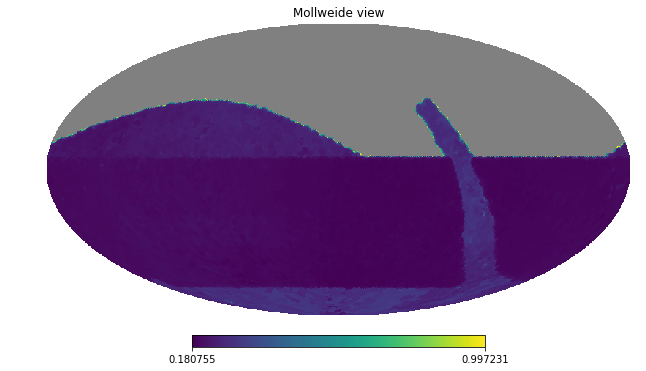

In [31]:
hp.mollview(bd['Phase Gap_LargestGap'].metricValues)